Отчёт по лабораторной работе номер 8. Бабенко Р.

Задания:

1. Обучить любую модель классификации на датасете IRIS до применения самописного PCA (2 компоненты) и после него. Сравнить качество классификации по отложенной выборке.
2. Написать свою реализацию метода главных компонент с помощью сингулярного разложения с использованием функции numpy.linalg.svd()

In [171]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# Загрузим ирис
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [172]:
# отмаштабируем выборку

def standard_scale(x):
    res = (x - x.mean(axis=0)) / x.std(axis=0)
    return res

X = standard_scale(X)

In [173]:
from sklearn.model_selection import train_test_split

# разделим выборку на обучающую и тестовую 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print(len(X_train))

105


In [174]:
# нам понадобится функция для определения качества классицикации
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [184]:
# будем обучаться с помощью DescisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier 

clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
predict = clf.predict(X_test) # получим наши предикты

# и посмотрим качество классификации
before_PCA = accuracy(predict, y_test)
before_PCA

0.9777777777777777

Получили отличный результат. Теперь применим самописный PCA, обучим модель и сравним значения

In [176]:
# уменьшим размерность
 
covariance_matrix = X_train.T @ X_train
eig_values, eig_vectors = np.linalg.eig(covariance_matrix)
eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:, i]) for i in range(len(eig_values))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)

W = np.hstack([eig_pairs[i][1].reshape(4,1) for i in range(2)])
Z_train = X_train.dot(W) # новая матрица объекты - признаки для обучающей выборки

covariance_matrix = X_test.T @ X_test
eig_values, eig_vectors = np.linalg.eig(covariance_matrix)
eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:, i]) for i in range(len(eig_values))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)

W = np.hstack([eig_pairs[i][1].reshape(4,1) for i in range(2)])
Z_test = X_test.dot(W) # новая матрица объекты - признаки для тестовой выборки

In [177]:
# обучим модель на новых признаках
clf = DecisionTreeClassifier()
clf = clf.fit(Z_train, y_train)

predict = clf.predict(Z_test) # получим наши предикты

# и посмотрим качество классификации
after_PSA = accuracy(predict, y_test)
after_PSA

0.7777777777777778

Итог: Качество обучения без PCA - 0.9777777777777777, с применением PSA - 0.7777777777777778

Точность снизилась, но думаю, не очень критично

Задание 2

Написать свою реализацию метода главных компонент с помощью сингулярного разложения с использованием функции numpy.linalg.svd()

Буду делать вот что:

- найти сингулярное разложение $X^TX$;
- сформировать из столбцов матрицы $V$, соответствующих $d$ наибольшим сингулярным числам, матрицу весов $W$;
- получить новую матрицу "объекты-признаки", умножив исходную матрицу $X$ на матрицу весов $W$:

$$Z=XW.$$

In [178]:
# Снова загрузим ирис и отмасштабируем выборку
iris = datasets.load_iris()
X, y = iris.data, iris.target

X = X.astype(float)
X = standard_scale(X)

In [185]:
# найдём сингулярное разложение
U, s, V = np.linalg.svd(X)

V # матрица собстввенных векторов

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [-0.37741762, -0.92329566, -0.02449161, -0.06694199],
       [ 0.71956635, -0.24438178, -0.14212637, -0.63427274],
       [ 0.26128628, -0.12350962, -0.80144925,  0.52359713]])

In [186]:
# сформируем вектор весов, так как мы уже значем, что нам понадобятся вервые две компоненты
W = np.hstack([eig_pairs[i][1].reshape(4,1) for i in range(2)])

W

array([[ 0.51223088, -0.3934228 ],
       [-0.31028758, -0.91240426],
       [ 0.56562618, -0.0375717 ],
       [ 0.56692872, -0.10642056]])

In [181]:
# Сформируем новую матрицу "объекты-признаки"
# умножаем исходную на матрицу весов
Z = X.dot(W) 

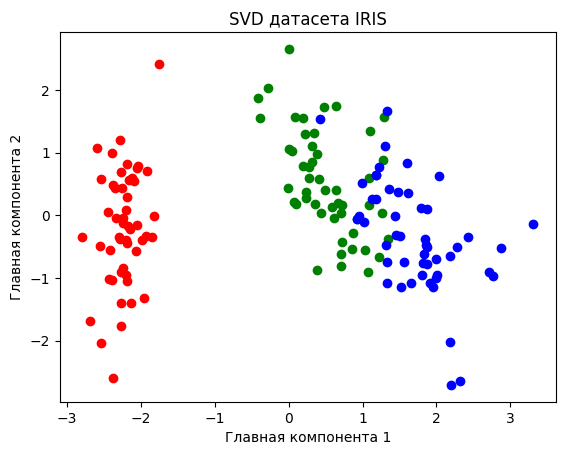

In [182]:
plt.figure()
y = iris.target
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(Z[y == i, 0], Z[y == i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('SVD датасета IRIS')
plt.show()

Как можно заметить, мы получили аналогичный результат, как и с PCA